### Preprocessing 

In [3]:
import os
import xml.etree.ElementTree as ET
import cv2

def convert_to_yolo_format(bbox, img_size, class_id=0):
    """
    Convert bbox from Pascal VOC format [xmin, ymin, xmax, ymax] to YOLO format.
    """
    dw = 1. / img_size[0]
    dh = 1. / img_size[1]
    x = (bbox[0] + bbox[2]) / 2.0
    y = (bbox[1] + bbox[3]) / 2.0
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return f"{class_id} {x:.6f} {y:.6f} {w:.6f} {h:.6f}"

def parse_annotation(xml_file, image_folder):
    """
    Parse the XML file to get the bounding box coordinates and write them in YOLO format.
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    filename = root.find('filename').text
    image_path = os.path.join(image_folder, filename)
    img_size = cv2.imread(image_path).shape
    
    boxes = []
    for obj in root.iter('object'):
        class_id = 0  # TODO: Set the correct class ID if you have multiple classes
        xmlbox = obj.find('bndbox')
        bbox = (
            int(xmlbox.find('xmin').text),
            int(xmlbox.find('ymin').text),
            int(xmlbox.find('xmax').text),
            int(xmlbox.find('ymax').text),
        )
        boxes.append(convert_to_yolo_format(bbox, img_size, class_id))
    return filename, boxes

def save_yolo_annotations(annotations_path, image_folder, output_path):
    """
    Convert and save the annotations in YOLO format.
    """
    for xml_file in os.listdir(annotations_path):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(annotations_path, xml_file)
            filename, boxes = parse_annotation(xml_path, image_folder)
            
            # Remove image extension and add .txt extension
            base_filename = os.path.splitext(filename)[0]
            output_txt_path = os.path.join(output_path, f"{base_filename}.txt")
            
            # Write the YOLO formatted bounding boxes to a .txt file
            with open(output_txt_path, 'w') as file:
                for box in boxes:
                    file.write(box + "\n")

# Paths to your dataset
annotations_path = 'archive/annotations'
image_folder = 'archive/images'
output_path = 'archive/processed_images'

# Convert and save annotations in YOLO format
save_yolo_annotations(annotations_path, image_folder, output_path)


ParseError: not well-formed (invalid token): line 1, column 0 (<string>)

In [5]:
import os
import cv2
import torch
import numpy as np
from easyocr import Reader


# Step 2: Detect license plates in images using a pre-trained YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def detect_license_plates(image_directory):
    images, labels, cropped_plates = [], [], []
    reader = Reader(['en'])

    for filename in os.listdir(image_directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_directory, filename)
            img = cv2.imread(img_path)
            results = model(img)
            detections = results.xyxy[0]

            for *xyxy, conf, cls in detections:
                x_min, y_min, x_max, y_max = map(int, xyxy)
                cropped_plate = img[y_min:y_max, x_min:x_max]
                cropped_plates.append(cropped_plate)

                # Step 3: Optional - Use EasyOCR to recognize text from cropped license plates
                ocr_result = reader.readtext(cropped_plate)
                label = max(ocr_result, key=lambda result: result[2])[1] if ocr_result else 'N/A'
                labels.append(label)

            images.append(img)

    return images, labels, cropped_plates

# Assume you have a directory of images to process
image_directory = 'archive/images'
images, labels, cropped_plates = detect_license_plates(image_directory)



Using cache found in /Users/khushimorparia/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-8 Python-3.11.5 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
labels

['Birit Toyota',
 'chio OSE',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '@LZC N 5617]',
 'HR 26 BC 5514',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '0ur216',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'Iinzulu 4153',
 'MN',
 'N/A',
 'N/A',
 'KAISER',
 'N/A',
 'N/A',
 'MH -',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'HR 26 BC 5514 ',
 'BB3 SD',
 'MH 208020',
 'N/A',
 'HRZGCE1L85',
 'DFUN',
 'DZIZ YXR',
 'GT',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '0u63 GI',
 '[622udl',
 'N/A',
 'N/A',
 'HH15BD8872',
 'HR 26 BU 0380',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'HA',
 'BYOND',
 'N/A',
 'KL54 4 2670',
 'KL54 4 2670',
 'Fisuas4',
 'N/A',
 'N/A',
 'Gx',
 'N/A',
 'Cuuse',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'ina Car

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/kaggle/working/training/dataset.yaml', epochs=100, imgsz=640, device=[0])

100%|██████████| 6.23M/6.23M [00:00<00:00, 47.1MB/s]


Ultralytics YOLOv8.1.45 🚀 Python-3.11.5 torch-2.2.2 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [10]:
torch.cuda.is_available()

False

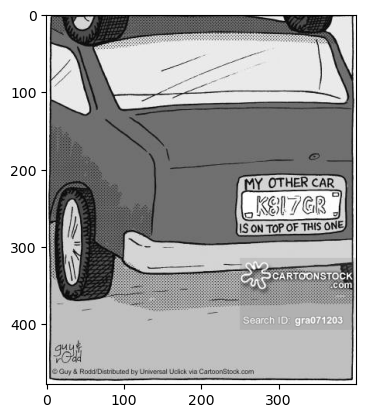

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

img = cv2.imread('archive/images/Cars207.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

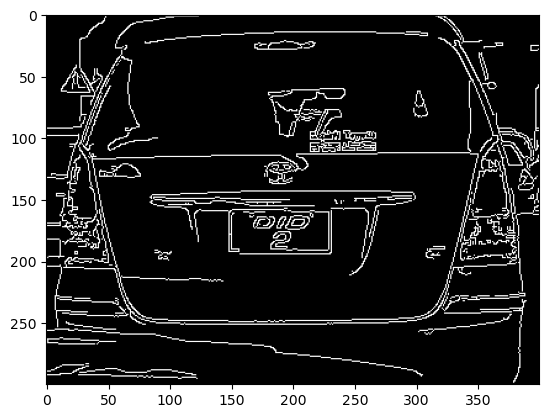

In [14]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [15]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

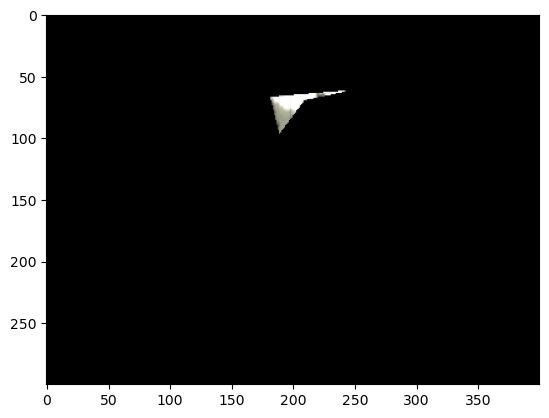

In [16]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

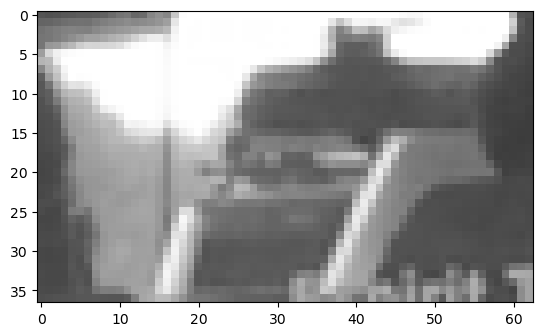

In [17]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [18]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

[]
